# Time Series Analyes and Visualization

First, I'll import the necessary packages and the data tables I prepared in pII.

In [1]:
# Import packages
import copy
import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


In [11]:
# Import prepared datasets
precip_flat = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\precip_flat.csv')
precip_multi = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\precip_multi.csv')
unique_stations = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\unique_stations.csv')
unique_basins = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\unique_basins.csv')
#unique_basins.head()


In [55]:
# Set visual choices.
sns.set_theme(style="ticks", palette=None, font_scale=1.35)


## Visualize regional patterns

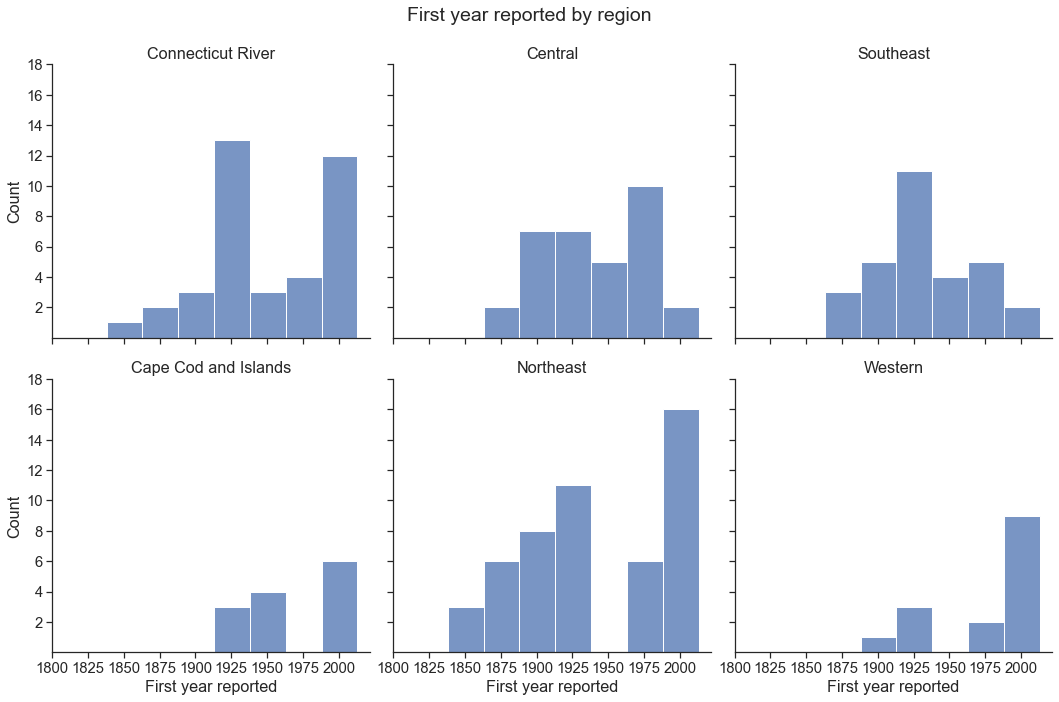

<Figure size 432x288 with 0 Axes>

In [69]:
# Plot Frequency of earliest year of data collection by region
first_year_plot = sns.displot(data=unique_stations, 
                kind='hist',
                x="First_year_collected", 
                col="Region",
                col_wrap=3,
                binwidth=25
                )

first_year_plot.set_axis_labels("First year reported")
first_year_plot.set_titles("{col_name}")

first_year_plot.set(xticks=range(1800,2025,25), yticks=[2, 4, 6, 8, 10, 12, 14, 16, 18])

first_year_plot.fig.subplots_adjust(top=.9)
first_year_plot.fig.suptitle("First year reported by region")
plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Freq_First-year-region.png')


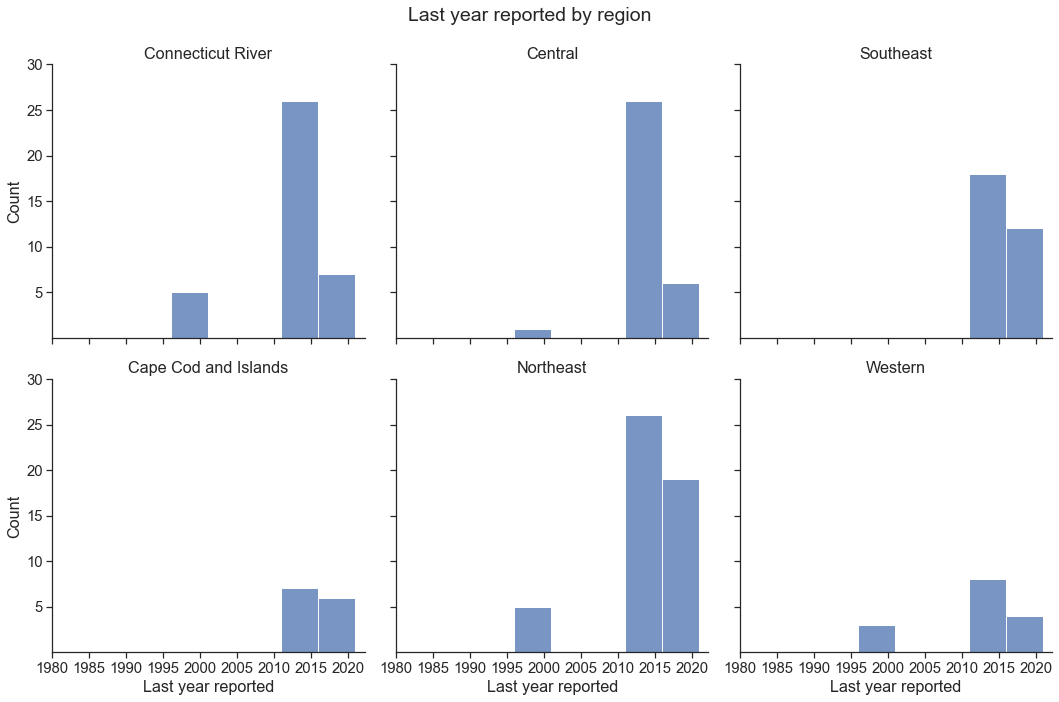

<Figure size 432x288 with 0 Axes>

In [70]:
# Plot Frequency of earliest year of data collection by region
last_year_plot = sns.displot(data=unique_stations, 
                kind='hist',
                x="Last_year_collected", 
                col="Region",
                col_wrap=3,
                binwidth=5
                )

last_year_plot.set_axis_labels("Last year reported")
last_year_plot.set_titles("{col_name}")

last_year_plot.set(xticks=range(1980,2025,5), yticks=[5, 10, 15, 20, 25, 30])

last_year_plot.fig.subplots_adjust(top=.9)
last_year_plot.fig.suptitle("Last year reported by region")

plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Freq_Last-year-region.png')


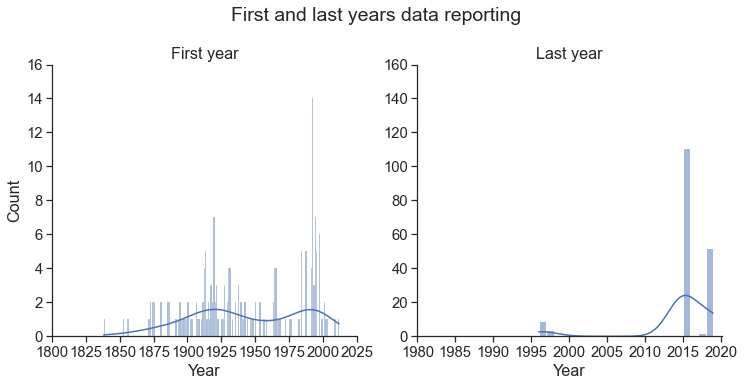

In [78]:
# Plot frequency of latest year reported for all stations
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(ax=axes[1], 
             data=unique_stations,
             x="Last_year_collected",
             binwidth=1,
             kde=True
            )

axes[1].set(xticks=range(1980,2025,5), yticks=range(0,180,20))
axes[1].set(xlabel="Year", ylabel="Frequency", title="Latest year")

sns.histplot(ax=axes[0],
             data=unique_stations,
             x="First_year_collected",
             binwidth=1,
             kde=True
            )

axes[0].set(xticks=range(1800,2050,25), yticks=range(0,18,2))
axes[0].set(xlabel="Year", ylabel="Count", title="First year")
axes[1].set(xlabel="Year", ylabel="", title="Last year")


fig.suptitle("First and last years data reporting", y=1.04)

sns.despine()

#plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Frequency-year-by-station.png')


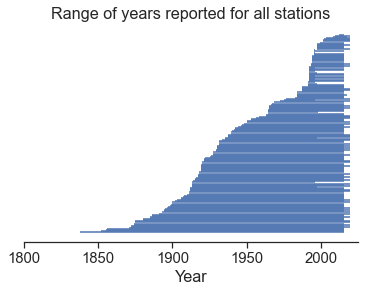

<Figure size 432x288 with 0 Axes>

In [72]:
# Plot earliest and latest data reporting date for each station.
n_stations = len(unique_stations) + 1 # This needs the plus one to work. Do not remove.
unique_stations = unique_stations.sort_values(by=['Last_year_collected', 'First_year_collected']) # Sorting makes it pretty.

g = plt.hlines(range(1,n_stations), unique_stations['First_year_collected'], unique_stations['Last_year_collected'])

g.axes.get_yaxis().set_ticks([]) # Hide y-axis ticks.
plt.xlim(1800,2025)
plt.xlabel("Year")
plt.title("Range of years reported for all stations")

sns.despine(left=True)

plt.show()
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/Range-years-by-station.png')


## LYN614 Exploration


In [6]:
lynn_data_30yr = pd.read_csv(r'C:\Users\15414\Documents\GitHub\MA Precip\MAPrecipData\Products\lynn_data_30yr.csv')
dates = pd.date_range("1-1-1990", periods=len(lynn_data_30yr), freq="M")
dates = pd.to_datetime(dates)
lynn_data_30yr["Date"] = dates
lynn_data_30yr = lynn_data_30yr.set_index("Date")
lynn_data_30yr = lynn_data_30yr.drop(columns="Station")
#lynn_data_30yr.head()


In [7]:
lynn_list = list(lynn_data_30yr['Precipitation'])
lynn_data_30yr_1d = pd.DataFrame(lynn_list, columns=['Precipitation'], index=pd.date_range("1-1-1990", periods=len(lynn_data_30yr), freq="M"))
lynn_data_30yr_1d = lynn_data_30yr_1d.dropna()
#lynn_data_30yr_1d.head()


Text(0.5, 1.0, 'Observed precipitation at station LYN614 (Lynn, MA)')

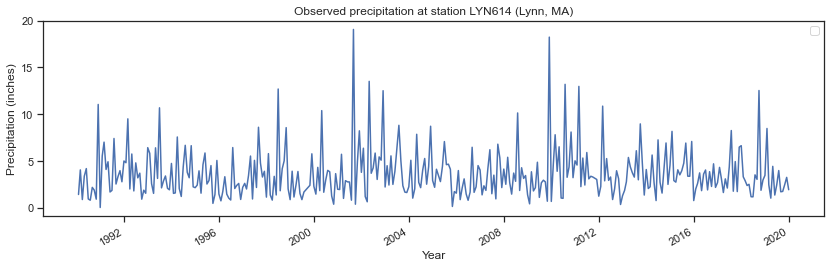

In [10]:
lynn_data_30yr_1d.plot(figsize=(14,4), xlabel="Year", ylabel="Precipitation (inches)")
plt.legend([''],[])
plt.title('Observed precipitation at station LYN614 (Lynn, MA)')
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Precipitation-per-year.png')


In [32]:
# See https://www.statsmodels.org/v0.12.0/_modules/statsmodels/tsa/seasonal.html.
# seasonal_decompose requires the arguement 'extrapolate_trend='freq'' to return residual and trend values.
st_decomp = seasonal_decompose(lynn_data_30yr_1d, period = 12, extrapolate_trend='freq')


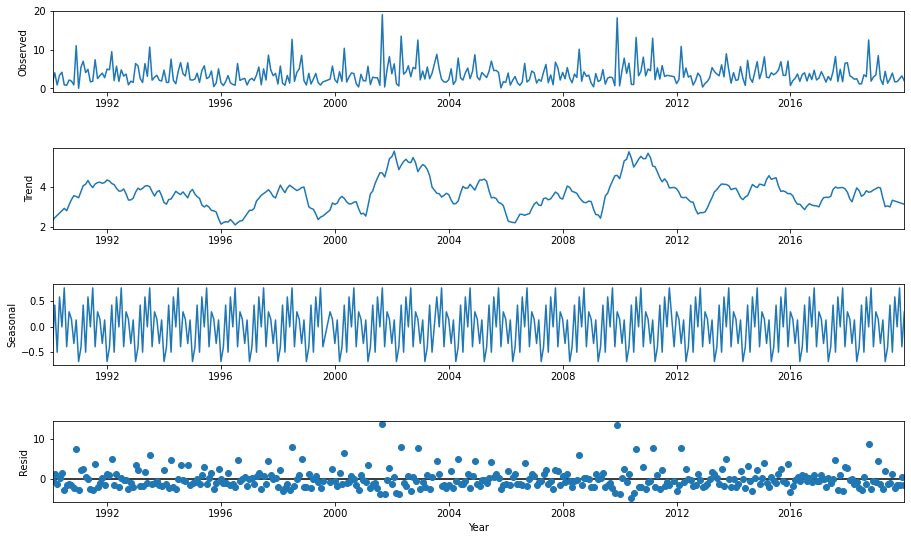

In [70]:
fig = st_decomp.plot()
fig.set_size_inches((14,8))
fig.axes[0].set_ylabel('Observed')
plt.xlabel('Year')

plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Seasonal-decomposition.png')


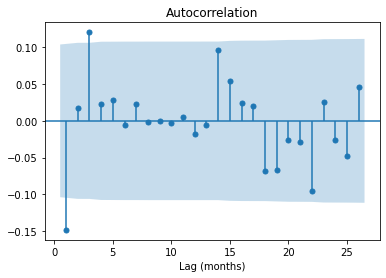

In [34]:
ACF_plot = plot_acf(lynn_data_30yr_1d, alpha=0.05, zero=False)
plt.xlabel('Lag (months)')
plt.savefig('C:/Users/15414/Documents/GitHub/MA Precip/MAPrecipData/Products/LYN614-Autocorrelation-plot.png')

# small obs: The following month is negatively-correlated while data three months out is positively-correlated. 
# Does the 3-month lag have to do with 3-month seasonality (which is waaay more prominent in MA than anywhere else I've lived?)

# another small obs: seasonality apparent given the occilation around y = 0, with larger non-sig oscillations 
# occuring approx. one to two years (but not 12 and 24 months) out from the period of interest. 
# Is this the effects of El Niño?

In [42]:
lynn_data_30yr.head(1)

,Year,Month,Precipitation
Date,,,
1990-01-31,1990,1,1.4


In [71]:
import lightgbm as lgb

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [216]:
# Separate data into test/train sets.

x = lynn_data_30yr.drop(columns = 'Precipitation')
y = lynn_data_30yr['Precipitation']

horizon = 12

x_train, x_test = x.iloc[:-horizon, :], x.iloc[-horizon:, :]
y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]


In [249]:
# Create a second test dataset to predict values past the dataset's end.

years = list(range(2020, 2023))
years = years * 12
years.sort()

months = list(range(1,13))
months = months * 3

dates = pd.date_range('1-1-2020', periods=len(years), freq="M")
dates = pd.to_datetime(dates)

extended_test = {'Year': years,
                 'Month': months,
                 'Date': dates
                }

extended_test = pd.DataFrame(twenties_test)
extended_test = extended_test.set_index('Date')
extended_test = extended_test.astype('int64')


In [218]:
# Load and train the model (Light Gradient Boosting).

model = lgb.LGBMRegressor()
model.fit(x_train, y_train)


LGBMRegressor()

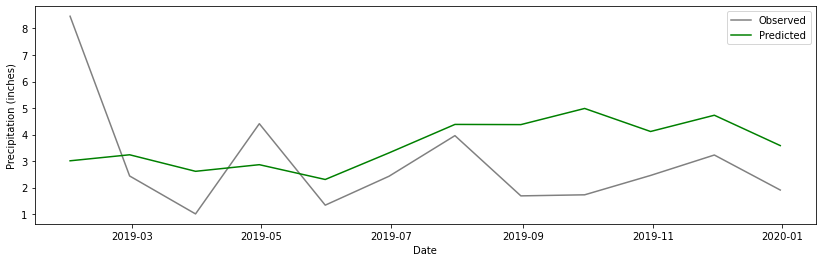

In [219]:
# Predicting and comparing 2019 actual and predicted values.

predictions_2019 = model.predict(x_test)

fig = plt.figure(figsize=(14,4))
plt.plot(y_test, color = 'grey')
plt.plot(pd.Series(predictions_2019, index=y_test.index), color = 'green')
plt.ylabel('Precipitation (inches)')
plt.xlabel('Date')
plt.legend(labels=['Observed', 'Predicted'])


In [220]:
r2 = round(metrics.r2_score(y_test, predictions_2019),3)
msle = round(metrics.mean_squared_log_error(y_test, predictions_2019),3)

print(f"r^2 = {r2} \nmsle = {msle}")


r^2 = -0.399 
msle = 0.247


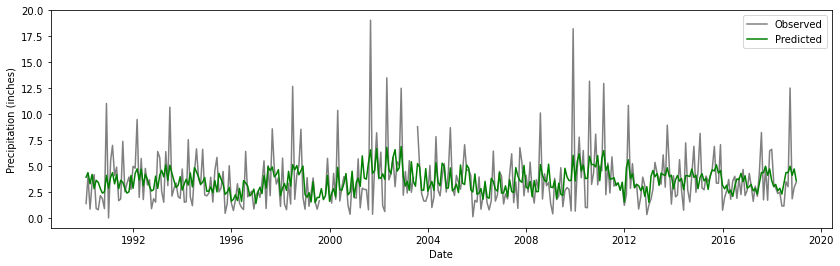

In [260]:
# Predicting training period data and comparing to observed.

predictions_before_2019 = model.predict(x_train)

fig = plt.figure(figsize=(14,4))
plt.plot(y_train, color = 'grey')
plt.plot(pd.Series(predictions_before_2019, index=y_train.index), color = 'green')
plt.ylabel('Precipitation (inches)')
plt.xlabel('Date')
plt.legend(labels=['Observed', 'Predicted'])

In [261]:
# Predicting training period data and comparing to observed.

predictions_after_2019 = model.predict(extended_test)


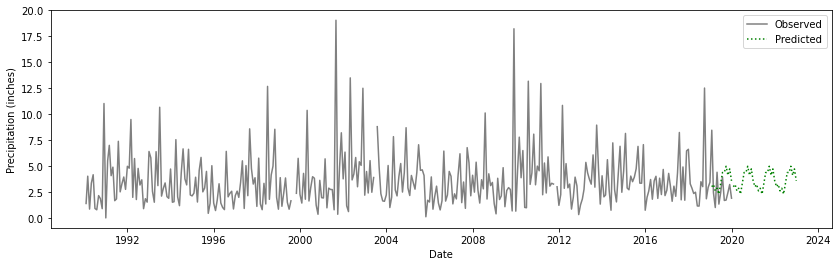

In [264]:
fig = plt.figure(figsize=(14,4))
plt.plot(lynn_data_30yr['Precipitation'], color = 'grey')
plt.plot(pd.Series(predictions_2019, index=x_test.index), color = 'green', ls = 'dotted')
plt.plot(pd.Series(predictions_after_2019, index=extended_test.index), color = 'green', ls = 'dotted')
plt.plot()
plt.ylabel('Precipitation (inches)')
plt.xlabel('Date')
plt.legend(labels=['Observed', 'Predicted'])

In [5]:
predictions_after_2019.head()


NameError: name 'predictions_after_2019' is not defined